In [0]:
from google.colab import files
uploaded= files.upload()

Saving Loan payments data.csv to Loan payments data.csv


In [0]:
import numpy as np
import pandas as pd

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
lpd_df = pd.read_csv("Loan payments data.csv")

In [0]:
lpd_df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [0]:
lpd_df

In [0]:
sns.heatmap(lpd_df.isnull(),yticklabels=False,cbar=False)

In [0]:
lpd_df.groupby('loan_status').agg(['count'])

,Loan_ID,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
,count,count,count,count,count,count,count,count,count,count
loan_status,,,,,,,,,,
COLLECTION,100,100,100,100,100,0,100,100,100,100
COLLECTION_PAIDOFF,100,100,100,100,100,100,100,100,100,100
PAIDOFF,300,300,300,300,300,300,0,300,300,300


In [0]:

lpd_df.drop('Loan_ID', axis=1, inplace=True)
lpd_df.drop('effective_date', axis=1, inplace=True)
lpd_df.drop('due_date', axis=1, inplace=True)
lpd_df.drop('paid_off_time', axis=1, inplace=True)

lpd_df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,NaN,45,High School or Below,male
1,PAIDOFF,1000,30,NaN,50,Bechalor,female
2,PAIDOFF,1000,30,NaN,33,Bechalor,female
3,PAIDOFF,1000,15,NaN,27,college,male
4,PAIDOFF,1000,30,NaN,28,college,female


In [0]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()


In [0]:
lpd_df['Gender']=le.fit_transform(lpd_df['Gender'])
lpd_df['education']=le.fit_transform(lpd_df['education'])
lpd_df['loan_status']=le.fit_transform(lpd_df['loan_status'])

In [0]:
lpd_df['past_due_days'] = pd.to_numeric(lpd_df['past_due_days'], errors='coerce')
lpd_df["past_due_days"].fillna("0", inplace = True)
lpd_df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,2,1000,30,0,45,1,1
1,2,1000,30,0,50,0,0
2,2,1000,30,0,33,0,0
3,2,1000,15,0,27,3,1
4,2,1000,30,0,28,3,0
...,...,...,...,...,...,...,...
495,1,1000,30,3,28,1,1
496,1,1000,15,14,26,1,1
497,1,800,15,3,30,3,1
498,1,1000,30,1,38,3,0


In [0]:
lpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   loan_status    500 non-null    int64 
 1   Principal      500 non-null    int64 
 2   terms          500 non-null    int64 
 3   past_due_days  500 non-null    object
 4   age            500 non-null    int64 
 5   education      500 non-null    int64 
 6   Gender         500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


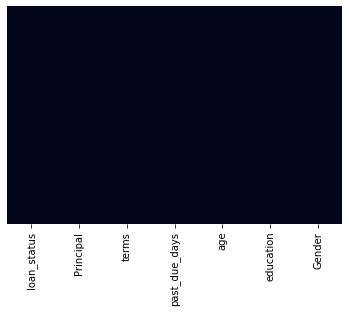

In [0]:
sns.heatmap(lpd_df.isnull(),yticklabels=False,cbar=False)

In [0]:
# splitting the features and labels

x = lpd_df.drop('loan_status',axis = 1)
y = lpd_df['loan_status']
print(x)
print(y)

     Principal  terms past_due_days  age  education  Gender
0         1000     30             0   45          1       1
1         1000     30             0   50          0       0
2         1000     30             0   33          0       0
3         1000     15             0   27          3       1
4         1000     30             0   28          3       0
..         ...    ...           ...  ...        ...     ...
495       1000     30             3   28          1       1
496       1000     15            14   26          1       1
497        800     15             3   30          3       1
498       1000     30             1   38          3       0
499       1000     30             8   28          1       1

[500 rows x 6 columns]
0      2
1      2
2      2
3      2
4      2
      ..
495    1
496    1
497    1
498    1
499    1
Name: loan_status, Length: 500, dtype: int64


In [0]:
#Train-Test split
from sklearn.model_selection import train_test_split

In [0]:

#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)


In [0]:
print(x_train.shape)

(350, 6)


In [0]:

# Building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6)

In [0]:
# fitting logistic regression model with x and y attributes of train data

logreg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# now applying our learnt model on test and also on train data

y_pred_test = logreg.predict(x_test)
y_pred_train = logreg.predict(x_train)

In [0]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))

Test Accuracy:  0.9866666666666667


In [0]:
#Creat an object to print the accuracy score for futher reference and is a duplication of the score printed in the previous line.
Test_Accuracy =  metrics.accuracy_score(y_test, y_pred_test)
Test_Accuracy

0.9866666666666667

In [0]:

# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))

Train Accuracy:  0.9685714285714285


In [0]:
Train_Accuracy =  metrics.accuracy_score (y_train, y_pred_train)
Train_Accuracy

0.9685714285714285

In [0]:
# creating a confusion matrix to understand the classification
conf = metrics.confusion_matrix(y_test, y_pred_test)

In [0]:
print(conf)

[[31  0  0]
 [ 2 29  0]
 [ 0  0 88]]


In [0]:
# Actual Values of y_test
y_test.value_counts()

2    88
1    31
0    31
Name: loan_status, dtype: int64

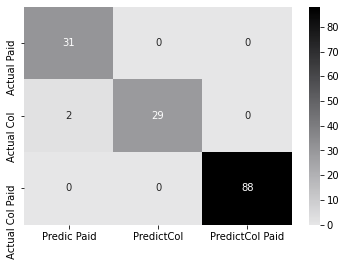

In [0]:
cmap = sns.cubehelix_palette(200, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['Predic Paid' , 'PredictCol' , 'PredictCol Paid'] ,yticklabels=['Actual Paid','Actual Col' ,' Actual Col Paid'], annot=True,
            fmt='d')

# uppdate final 1

In [0]:
# Creating Classification Report

cr = metrics.classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.94      0.97        31
           2       1.00      1.00      1.00        88

    accuracy                           0.99       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.99      0.99      0.99       150



In [0]:
# subsetting the dataframe to remove data for customers who PAID 

lpd2_df= lpd_df[lpd_df["loan_status"] == 2]
lpd2_df

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,2,1000,30,0.0,45,1,1
1,2,1000,30,0.0,50,0,0
2,2,1000,30,0.0,33,0,0
3,2,1000,15,0.0,27,3,1
4,2,1000,30,0.0,28,3,0
...,...,...,...,...,...,...,...
295,2,1000,30,0.0,30,3,0
296,2,800,15,0.0,27,3,1
297,2,1000,30,0.0,29,1,1
298,2,1000,30,0.0,40,1,1


In [0]:

# subsetting the dataframe to remove rowwise data for customers who PAID after due date and collection calls where 0= collection & 1= collection paid off

lpd1 = ['0', '1']
lpd1_df =lpd_df.loc[lpd_df['loan_status'].isin(lpd1)]

lpd1_df

,loan_status,Principal,terms,past_due_days,age,education,Gender
300,0,1000,15,76.0,29,3,1
301,0,1000,30,61.0,37,1,1
302,0,1000,30,61.0,33,1,1
303,0,800,15,76.0,27,3,1
304,0,800,15,76.0,24,0,1
...,...,...,...,...,...,...,...
495,1,1000,30,3.0,28,1,1
496,1,1000,15,14.0,26,1,1
497,1,800,15,3.0,30,3,1
498,1,1000,30,1.0,38,3,0


In [0]:
#Train-Test split
from sklearn.model_selection import train_test_split

In [0]:
# splitting the features and labels

x1 = lpd1_df.drop('loan_status',axis = 1)
y1 = lpd1_df['loan_status']
print(x1)
print(y1)

     Principal  terms  past_due_days  age  education  Gender
300       1000     15           76.0   29          3       1
301       1000     30           61.0   37          1       1
302       1000     30           61.0   33          1       1
303        800     15           76.0   27          3       1
304        800     15           76.0   24          0       1
..         ...    ...            ...  ...        ...     ...
495       1000     30            3.0   28          1       1
496       1000     15           14.0   26          1       1
497        800     15            3.0   30          3       1
498       1000     30            1.0   38          3       0
499       1000     30            8.0   28          1       1

[200 rows x 6 columns]
300    0
301    0
302    0
303    0
304    0
      ..
495    1
496    1
497    1
498    1
499    1
Name: loan_status, Length: 200, dtype: int64


In [0]:

#train test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.30, random_state=42)

In [0]:
print(x_train1.shape)

(140, 6)


In [0]:

# Building logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.6)

In [0]:
# fitting logistic regression model with x and y attributes of train data

logreg.fit(x_train1, y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.6, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# now applying our learnt model on test and also on train data

y_pred_test1 = logreg.predict(x_test1)
y_pred_train1 = logreg.predict(x_train1)

In [0]:
y_pred_test1

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0])

In [0]:
y_pred_train1

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1])

In [0]:
# comparing the metrics of predicted lebel and real label of test data
print("Test Accuracy1: ", metrics.accuracy_score(y_test1, y_pred_test1))

Test Accuracy1:  0.9333333333333333


In [0]:

#creat an object for accuracy score fir further reference
Test_Accuracy1 =  metrics.accuracy_score(y_test1, y_pred_test1)
Test_Accuracy1

0.9333333333333333

In [0]:
# comparing the metrics of predicted lebel and real label of test data
print("Train Accuracy1: ", metrics.accuracy_score(y_train1, y_pred_train1))

Train Accuracy1:  0.9642857142857143


In [0]:
Train_Accuracy1 =  metrics.accuracy_score(y_train1, y_pred_train1)
Train_Accuracy1

0.9642857142857143

In [0]:
# creating a confusion matrix to understand the classification
conf1 = metrics.confusion_matrix(y_test1, y_pred_test1)

In [0]:
print(conf1)

[[29  2]
 [ 2 27]]


In [0]:
# Actual Values of y_test
y_test1.value_counts()

0    31
1    29
Name: loan_status, dtype: int64

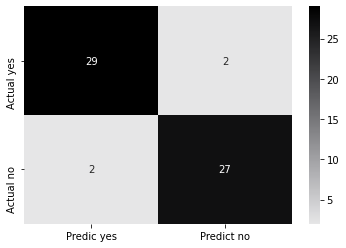

In [0]:
cmap = sns.cubehelix_palette(200, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf1,cmap = cmap,xticklabels=['Predic yes' , 'Predict no'] ,yticklabels=['Actual yes','Actual no' ], annot=True,
            fmt='d')

In [0]:
print(metrics.classification_report(y_test1,y_pred_test1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.93      0.93      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



In [0]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Log. Reg Loan Status; All Classes',  'Log. Reg Loan Status; Post due dt' ],
        'Training_Score' : [Train_Accuracy , Train_Accuracy1 ],
        'Testing_Score'  : [Test_Accuracy , Test_Accuracy1 ],
        'Remarks'        : ['n/a', 'Test Accuracy lower: possibly due to reduced datasize']
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score,Remarks
0,Log. Reg Loan Status; All Classes,0.968571,0.986667,n/a
1,Log. Reg Loan Status; Post due dt,0.964286,0.933333,Test Accuracy lower: possibly due to reduced d...


# The End